# Assignmnt 3


## Clustering -Finding related posts Measuring the relatedness of post

The naive approach is to calculate its similarity to all other posts and display thee top n 
top n most similar posts

## Convetrting raw text into a bag of words

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [2]:
vectorizer = CountVectorizer(min_df = 1)

In [3]:
vectorizer

CountVectorizer()

In [4]:
content = ["how to format my hard disk ","hard disk format problems"]
X = vectorizer.fit_transform(content)
vectorizer.get_feature_names()

/home/aroooon/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

In [5]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]])

In [8]:
X.toarray().transpose()

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0]])

## Counting Words

In [72]:
from pathlib import Path 
Toy_Dir = Path('data/toy')
posts = []
for fn in Toy_Dir.iterdir():
    with open(fn ,'r') as f:
        posts.append(f.read())
posts

['This is a toy post about machine learning. Actually, it contains not much interesting stuff.',
 'Imaging databases store data. Imaging databases store data. Imaging databases store data.',
 'Most imaging databases save images permanently.\n',
 'Imaging databases store data.',
 'Imaging databases provide storage capabilities.']

In [73]:
vectorizer = CountVectorizer(min_df=1)
X_train = vectorizer.fit_transform(posts)

In [74]:
num_samples,num_features = X_train.shape
num_samples,num_features

(5, 25)

In [75]:
X_train.toarray()

array([[1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 1],
       [0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
        0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0]])

In [76]:
vectorizer.get_feature_names()

/home/aroooon/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['about',
 'actually',
 'capabilities',
 'contains',
 'data',
 'databases',
 'images',
 'imaging',
 'interesting',
 'is',
 'it',
 'learning',
 'machine',
 'most',
 'much',
 'not',
 'permanently',
 'post',
 'provide',
 'save',
 'storage',
 'store',
 'stuff',
 'this',
 'toy']

In [19]:
new_post = "imaging databases"
new_post_vec = vectorizer.transform([new_post])
print(new_post_vec)

  (0, 5)	1
  (0, 7)	1


In [20]:
print(new_post_vec.toarray())

[[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [27]:
len(new_post_vec.toarray()[0])

25

In [28]:
"""We need to use full array if we want to use it as a vector for similarity calculation"""

'We need to use full array if we want to use it as a vector for similarity calculation'

In [29]:
def dist_raw(v1,v2):
    delta = v1-v2
    return scipy.linalg.norm(delta.toarray())

In [30]:
"""Here the norm fun calculates the euclidean distance """

'Here the norm fun calculates the euclidean distance '

In [38]:
import scipy

In [39]:
def best_post(X, new_vec , dist_func):
    best_doc= None
    best_dist = float('inf')
    best_i = None
    for i,post in enumerate(posts):
        if post == new_post:
            continue
        post_vec = X.getrow(i)
        d = dist_func(post_vec,new_vec)
        print("=== Post %i with dist=%.2f:\n    '%s'" % \
              (i, d, post)) 
        if d < best_dist: 
            best_dist = d 
            best_i = i
    print("\n==> Best post is %i with dist=%.2f" % \
          (best_i, best_dist))
    

In [40]:
best_post(X_train, new_post_vec, dist_raw)

=== Post 0 with dist=4.00:
    'This is a toy post about machine learning. Actually, it contains not much interesting stuff.'
=== Post 1 with dist=5.10:
    'Imaging databases store data. Imaging databases store data. Imaging databases store data.'
=== Post 2 with dist=2.00:
    'Most imaging databases save images permanently.
'
=== Post 3 with dist=1.41:
    'Imaging databases store data.'
=== Post 4 with dist=1.73:
    'Imaging databases provide storage capabilities.'

==> Best post is 3 with dist=1.41


In [41]:
for i,post in enumerate(posts):
    print(i)
    print(post)
    

0
This is a toy post about machine learning. Actually, it contains not much interesting stuff.
1
Imaging databases store data. Imaging databases store data. Imaging databases store data.
2
Most imaging databases save images permanently.

3
Imaging databases store data.
4
Imaging databases provide storage capabilities.


In [91]:
print(X_train.getrow(4).toarray())

[[0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]]


In [86]:
print(X_train.getrow(0))

  (0, 23)	1
  (0, 9)	1
  (0, 24)	1
  (0, 17)	1
  (0, 0)	1
  (0, 12)	1
  (0, 11)	1
  (0, 1)	1
  (0, 10)	1
  (0, 3)	1
  (0, 15)	1
  (0, 14)	1
  (0, 8)	1
  (0, 22)	1


In [78]:
a='This is a toy post about machine learning. Actually, it contains not much interesting stuff.'
a_v = vectorizer.transform([a])
print(a_v)

  (0, 0)	1
  (0, 1)	1
  (0, 3)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 14)	1
  (0, 15)	1
  (0, 17)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1


In [87]:
print(X_train.getrow(3))

  (0, 7)	1
  (0, 5)	1
  (0, 21)	1
  (0, 4)	1


In [89]:
a='Imaging databases store data.'
a_v = vectorizer.transform([a])
print(a_v)

  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 21)	1


## Normalizing the word count and vectors

In [93]:
scipy.linalg.norm(a_v.toarray())

2.0

In [94]:
def dist_norm(v1,v2):
    v1_normalized = v1/ scipy.linalg.norm(v1.toarray())
    v2_normalized = v2/ scipy.linalg.norm(v1.toarray())
    delta = v1_normalized-v2_normalized
    return scipy.linalg.norm(delta.toarray())
    

In [96]:
best_post(X_train,new_post_vec,dist_norm)

=== Post 0 with dist=1.07:
    'This is a toy post about machine learning. Actually, it contains not much interesting stuff.'
=== Post 1 with dist=0.85:
    'Imaging databases store data. Imaging databases store data. Imaging databases store data.'
=== Post 2 with dist=0.82:
    'Most imaging databases save images permanently.
'
=== Post 3 with dist=0.71:
    'Imaging databases store data.'
=== Post 4 with dist=0.77:
    'Imaging databases provide storage capabilities.'

==> Best post is 3 with dist=0.71


## Preprocessing – similarity measured as a similar number of common words

In [99]:
vect_engl = CountVectorizer(min_df=1, stop_words='english')
print(sorted(vect_engl.get_stop_words())[0:20])

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst']


In [100]:
X_train_engl = vect_engl.fit_transform(posts)
num_samples_engl, num_features_engl = X_train_engl.shape
print("#samples: %d, #features: %d" % (num_samples_engl,  num_features_engl))
print(vect_engl.get_feature_names())

#samples: 5, #features: 18
['actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'learning', 'machine', 'permanently', 'post', 'provide', 'save', 'storage', 'store', 'stuff', 'toy']


/home/aroooon/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [101]:
new_post_vec_engl = vect_engl.transform([new_post]) 
print(new_post_vec_engl)

  (0, 4)	1
  (0, 6)	1


In [103]:
best_post(X_train_engl,new_post_vec_engl,dist_norm)

=== Post 0 with dist=1.12:
    'This is a toy post about machine learning. Actually, it contains not much interesting stuff.'
=== Post 1 with dist=0.85:
    'Imaging databases store data. Imaging databases store data. Imaging databases store data.'
=== Post 2 with dist=0.77:
    'Most imaging databases save images permanently.
'
=== Post 3 with dist=0.71:
    'Imaging databases store data.'
=== Post 4 with dist=0.77:
    'Imaging databases provide storage capabilities.'

==> Best post is 3 with dist=0.71


In [104]:
import nltk.stem

In [106]:
s = nltk.stem.SnowballStemmer('english')
print(s.stem("graphics"))

graphic


In [107]:
print(s.stem("imaging"))
print(s.stem("image"))
print(s.stem("imagination"))
print(s.stem("imagine"))
print(s.stem("buys"))
print(s.stem("buying"))
print(s.stem("bought"))


imag
imag
imagin
imagin
buy
buy
bought


In [139]:
english_stremmer = nltk.stem.SnowballStemmer('english')

In [157]:
class StemmedCountVectorizer(CountVectorizer): 
    def build_analyzer(self): 
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in  analyzer(doc))

vect_engl_stem = StemmedCountVectorizer(min_df=1, stop_words='english')        
print(vect_engl_stem)

StemmedCountVectorizer(stop_words='english')


In [158]:
X_train_engl_stem = vect_engl_stem.fit_transform(posts)
num_samples_engl_stem, num_features_engl_stem = X_train_engl_stem.shape
print("#samples: %d, #features: %d" % (num_samples_engl_stem,  num_features_engl_stem))
print(vect_engl_stem.get_feature_names())

#samples: 5, #features: 17
['actual', 'capabl', 'contain', 'data', 'databas', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'provid', 'save', 'storag', 'store', 'stuff', 'toy']


In [159]:
new_post_vec_engl_stem = vect_engl_stem.transform([new_post]) 
print(new_post_vec_engl_stem)

best_post(X_train_engl_stem, new_post_vec_engl_stem, dist_norm)

  (0, 4)	1
  (0, 5)	1
=== Post 0 with dist=1.12:
    'This is a toy post about machine learning. Actually, it contains not much interesting stuff.'
=== Post 1 with dist=0.85:
    'Imaging databases store data. Imaging databases store data. Imaging databases store data.'
=== Post 2 with dist=0.65:
    'Most imaging databases save images permanently.
'
=== Post 3 with dist=0.71:
    'Imaging databases store data.'
=== Post 4 with dist=0.77:
    'Imaging databases provide storage capabilities.'

==> Best post is 2 with dist=0.65


## Stop words on steroids using TFIDF

In [160]:
def tfidf(term, doc, corpus):
    tf = doc.count(term) / len(doc)
    idf = np.log(float(len(corpus)) / (len([d for d in corpus if term in d])))
    tf_idf = tf * idf
    print("term='%s'   doc=%-17s tf=%.2f   idf=%.2f"%\
          (term, doc, tf, idf))
    return tf_idf

# defining some documents
a, abb, abc = ["a"], ["a", "b", "b"], ["a", "b", "c"]

# defining some copora
D = [a, abb, abc]

print("=> tfidf=%.2f" % tfidf("a", a, D))
print("=> tfidf=%.2f" % tfidf("a", abb, D))
print("=> tfidf=%.2f" % tfidf("a", abc, D))
print("=> tfidf=%.2f" % tfidf("b", abb, D))
print("=> tfidf=%.2f" % tfidf("b", abc, D))
print("=> tfidf=%.2f" % tfidf("c", abc, D))

term='a'   doc=['a']             tf=1.00   idf=0.00
=> tfidf=0.00
term='a'   doc=['a', 'b', 'b']   tf=0.33   idf=0.00
=> tfidf=0.00
term='a'   doc=['a', 'b', 'c']   tf=0.33   idf=0.00
=> tfidf=0.00
term='b'   doc=['a', 'b', 'b']   tf=0.67   idf=0.41
=> tfidf=0.27
term='b'   doc=['a', 'b', 'c']   tf=0.33   idf=0.41
=> tfidf=0.14
term='c'   doc=['a', 'b', 'c']   tf=0.33   idf=1.10
=> tfidf=0.37


In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer

class StemmedTfidfVectorizer(TfidfVectorizer):

    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vect_tfidf = StemmedTfidfVectorizer(#min_df=10, max_df=0.5,
                                    stop_words='english', decode_error='ignore')
print(vect_tfidf)

StemmedTfidfVectorizer(decode_error='ignore', stop_words='english')


In [162]:
X_train_tfidf = vect_tfidf.fit_transform(posts)
num_samples_tfidf, num_features_tfidf = X_train_tfidf.shape
print("#samples: %d, #features: %d" % (num_samples_tfidf,  num_features_tfidf))
print(vect_tfidf.get_feature_names())

#samples: 5, #features: 17
['actual', 'capabl', 'contain', 'data', 'databas', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'provid', 'save', 'storag', 'store', 'stuff', 'toy']


## K-means Clustering

<module 'matplotlib.pyplot' from '/home/aroooon/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

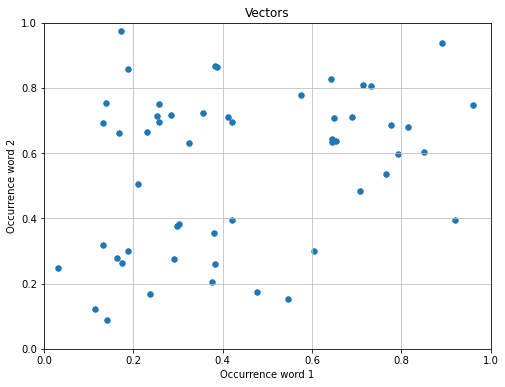

In [167]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

seed = 2
np.random.seed(seed)  # to reproduce the data later on

num_clusters = 3


def plot_clustering(x, y, title, mx=None, ymax=None, xmin=None, km=None):
    plt.figure(num=None, figsize=(8, 6))
    if km:
        plt.scatter(x, y, s=30, c=km.predict(list(zip(x, y))))
    else:
        plt.scatter(x, y, s=30)

    plt.title(title)
    plt.xlabel("Occurrence word 1")
    plt.ylabel("Occurrence word 2")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0, ymax=1)
    plt.xlim(xmin=0, xmax=1)
    plt.grid(True, linestyle='-', color='0.75')

    return plt


xw1 = scipy.stats.norm(loc=0.3, scale=.15).rvs(20)
yw1 = scipy.stats.norm(loc=0.3, scale=.15).rvs(20)

xw2 = scipy.stats.norm(loc=0.7, scale=.15).rvs(20)
yw2 = scipy.stats.norm(loc=0.7, scale=.15).rvs(20)

xw3 = scipy.stats.norm(loc=0.2, scale=.15).rvs(20)
yw3 = scipy.stats.norm(loc=0.8, scale=.15).rvs(20)

x = np.append(np.append(xw1, xw2), xw3)
y = np.append(np.append(yw1, yw2), yw3)

plot_clustering(x, y, "Vectors")


## Clustering after 1st iteration

Initialization complete
Iteration 0, inertia 4.7485267474116775


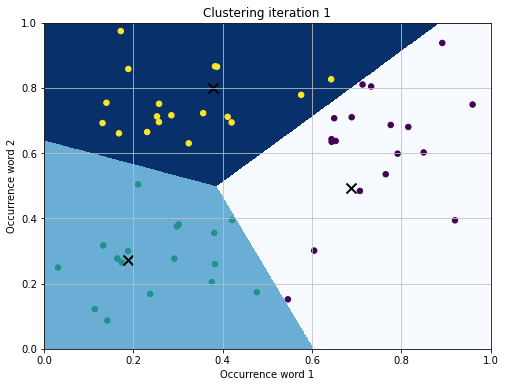

In [169]:
mx, my = np.meshgrid(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001))

km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=1,
            random_state=seed)
km.fit(np.array(list(zip(x, y))))

Z = km.predict(np.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 1", km=km)
plt.imshow(Z, interpolation='nearest',
           extent=(mx.min(), mx.max(), my.min(), my.max()),
           cmap=plt.cm.Blues,
           aspect='auto', origin='lower')

c1a, c1b, c1c = km.cluster_centers_
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')

## Clustering after 2nd iteration

Initialization complete
Iteration 0, inertia 4.748526747411677
Iteration 1, inertia 3.378785693965447


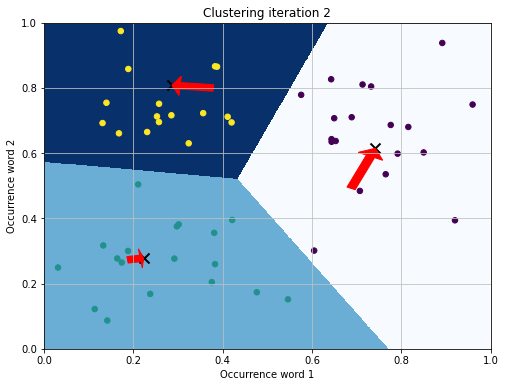

In [171]:
km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=2,
            random_state=seed)
km.fit(np.array(list(zip(x, y))))

Z = km.predict(np.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 2", km=km)
plt.imshow(Z, interpolation='nearest',
           extent=(mx.min(), mx.max(), my.min(), my.max()),
           cmap=plt.cm.Blues,
           aspect='auto', origin='lower')

c2a, c2b, c2c = km.cluster_centers_
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')

plt.gca().add_patch(plt.Arrow(c1a[0], c1a[1], c2a[0] - c1a[0], c2a[1] - c1a[1], width=0.1, color='red'))
plt.gca().add_patch(plt.Arrow(c1b[0], c1b[1], c2b[0] - c1b[0], c2b[1] - c1b[1], width=0.1, color='red'))
plt.gca().add_patch(plt.Arrow(c1c[0], c1c[1], c2c[0] - c1c[0], c2c[1] - c1c[1], width=0.1, color='red'))


## Final clustering
We iterate at max 10 iterations, but will converge earlier.

Initialization complete
Iteration 0, inertia 4.7485267474116775
Iteration 1, inertia 3.3787856939654475
Iteration 2, inertia 2.5999573206286968
Iteration 3, inertia 2.4965711402374207
Iteration 4, inertia 2.447223016211801
Converged at iteration 4: strict convergence.


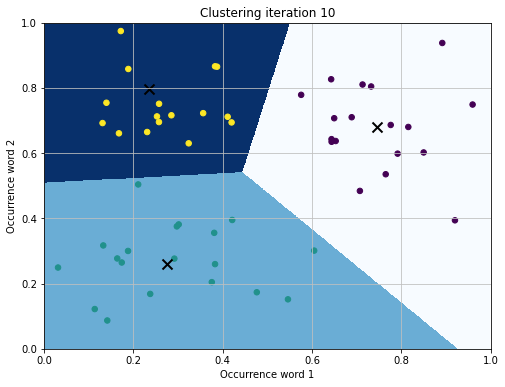

In [173]:
# 10 iterations
km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=10,
            random_state=seed)
km.fit(np.array(list(zip(x, y))))

Z = km.predict(np.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 10", km=km)
plt.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=plt.cm.Blues,
             aspect='auto', origin='lower')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')


##  Testing our idea on real data

In [175]:
import sklearn.datasets
all_data = sklearn.datasets.fetch_20newsgroups(subset='all') 
print(len(all_data.filenames))
print(all_data.target_names)

18846
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [177]:
import sklearn.datasets
all_data = sklearn.datasets.fetch_20newsgroups(subset='all') 
print(len(all_data.filenames))
print(all_data.target_names)

18846
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [178]:
groups = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
          'comp.sys.mac.hardware', 'comp.windows.x', 'sci.space']

train_data = sklearn.datasets.fetch_20newsgroups(subset="train", categories=groups)
print(len(train_data.filenames))

test_data = sklearn.datasets.fetch_20newsgroups(subset='test', categories=groups)
print(len(test_data.filenames))

3529
2349


##  Clustering posts

In [179]:
vectorizer = StemmedTfidfVectorizer(min_df=10, max_df=0.5,
                                    stop_words='english', decode_error='ignore')
vectorized = vectorizer.fit_transform(train_data.data)

num_samples, num_features = vectorized.shape
print("#samples: %d, #features: %d" % (num_samples, num_features))

#samples: 3529, #features: 4712


In [180]:
num_clusters = 50  # np.unique(labels).shape[0]

km = KMeans(n_clusters=num_clusters, n_init=1, verbose=1, random_state=3)
clustered = km.fit(vectorized)

Initialization complete
Iteration 0, inertia 5686.052543663701
Iteration 1, inertia 3164.8875140123578
Iteration 2, inertia 3132.2077111951476
Iteration 3, inertia 3111.7125758781403
Iteration 4, inertia 3098.583773647866
Iteration 5, inertia 3092.1905280374417
Iteration 6, inertia 3087.277089244311
Iteration 7, inertia 3084.1004773772725
Iteration 8, inertia 3082.7997677507024
Iteration 9, inertia 3082.234382617418
Iteration 10, inertia 3081.9487984162015
Iteration 11, inertia 3081.843333964574
Iteration 12, inertia 3081.790665037128
Iteration 13, inertia 3081.7522177638257
Iteration 14, inertia 3081.659718679883
Iteration 15, inertia 3081.61679146951
Iteration 16, inertia 3081.5894842981666
Iteration 17, inertia 3081.5709703035714
Converged at iteration 17: strict convergence.


In [181]:
print("km.labels_=%s" % km.labels_)
print("km.labels_.shape=%s" % km.labels_.shape)

km.labels_=[48 23 31 ...  6  2 22]
km.labels_.shape=3529


## Solving our initial challenge 

In [182]:
new_post = '''\
Disk drive problems. Hi, I have a problem with my hard disk.
After 1 year it is working only sporadically now.
I tried to format it, but now it doesn't boot any more.
Any ideas? Thanks.
'''

new_post_vec = vectorizer.transform([new_post])
new_post_label = km.predict(new_post_vec)[0]

similar_indices = (km.labels_ == new_post_label).nonzero()[0]

similar = []
for i in similar_indices:
    dist = scipy.linalg.norm((new_post_vec - vectorized[i]).toarray())
    similar.append((dist, train_data.data[i]))

In [183]:
similar = sorted(similar)
print("Count similar: %i" % len(similar))

show_at_1 = similar[0]
show_at_2 = similar[len(similar) // 10]
show_at_3 = similar[len(similar) // 2]

print("=== #1 ===")
print(show_at_1)
print()

print("=== #2 ===")
print(show_at_2)
print()

print("=== #3 ===")
print(show_at_3)

Count similar: 56
=== #1 ===
(1.0378441731334072, "From: Thomas Dachsel <GERTHD@mvs.sas.com>\nSubject: BOOT PROBLEM with IDE controller\nNntp-Posting-Host: sdcmvs.mvs.sas.com\nOrganization: SAS Institute Inc.\nLines: 25\n\nHi,\nI've got a Multi I/O card (IDE controller + serial/parallel\ninterface) and two floppy drives (5 1/4, 3 1/2) and a\nQuantum ProDrive 80AT connected to it.\nI was able to format the hard disk, but I could not boot from\nit. I can boot from drive A: (which disk drive does not matter)\nbut if I remove the disk from drive A and press the reset switch,\nthe LED of drive A: continues to glow, and the hard disk is\nnot accessed at all.\nI guess this must be a problem of either the Multi I/o card\nor floppy disk drive settings (jumper configuration?)\nDoes someone have any hint what could be the reason for it.\nPlease reply by email to GERTHD@MVS.SAS.COM\nThanks,\nThomas\n+-------------------------------------------------------------------+\n| Thomas Dachsel            

In [184]:
post_group = zip(train_data.data, train_data.target)

# Create a list of tuples that can be sorted by
# the length of the posts
all = [(len(post[0]), post[0], train_data.target_names[post[1]])
       for post in post_group]
graphics = sorted([post for post in all if post[2] == 'comp.graphics'])
print(graphics[5])

(245, 'From: SITUNAYA@IBM3090.BHAM.AC.UK\nSubject: test....(sorry)\nOrganization: The University of Birmingham, United Kingdom\nLines: 1\nNNTP-Posting-Host: ibm3090.bham.ac.uk\n\n==============================================================================\n', 'comp.graphics')


In [185]:
noise_post = graphics[5][1]

analyzer = vectorizer.build_analyzer()
print(list(analyzer(noise_post)))

['situnaya', 'ibm3090', 'bham', 'ac', 'uk', 'subject', 'test', 'sorri', 'organ', 'univers', 'birmingham', 'unit', 'kingdom', 'line', 'nntp', 'post', 'host', 'ibm3090', 'bham', 'ac', 'uk']


In [186]:
useful = set(analyzer(noise_post)).intersection(vectorizer.get_feature_names())
print(sorted(useful))

['ac', 'birmingham', 'host', 'kingdom', 'nntp', 'sorri', 'test', 'uk', 'unit', 'univers']


/home/aroooon/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [187]:
for term in sorted(useful):
    print('IDF(%-10s) = %.2f' % (term, vectorizer._tfidf.idf_[vectorizer.vocabulary_[term]]))

IDF(ac        ) = 3.51
IDF(birmingham) = 6.77
IDF(host      ) = 1.74
IDF(kingdom   ) = 6.68
IDF(nntp      ) = 1.77
IDF(sorri     ) = 4.14
IDF(test      ) = 3.83
IDF(uk        ) = 3.70
IDF(unit      ) = 4.42
IDF(univers   ) = 1.91


## Tweaking the Parameters

In [192]:
""" We can tweak the number of clusters, or play with the vectorizer's max_features We can also try some different cluster center  initialization.for term in sorted(useful): There are more exciting alternatives to K-means itself. There are, for example, clustering approaches that let you use different similarity measurements, such as Cosine similarity, Pearson, or Jaccard"""

" We can tweak the number of clusters, or play with the vectorizer's max_features We can also try some different cluster center  initialization.for term in sorted(useful): There are more exciting alternatives to K-means itself. There are, for example, clustering approaches that let you use different similarity measurements, such as Cosine similarity, Pearson, or Jaccard"